An experiment was conducted [30] with the goal of maximizing meadowfoam flower production. The data and a more detailed description are provided in Problem 2.15 (data set: flowers). In that earlier problem, a linear regression model was fitted to the given data.
1. Perform a diagnostic analysis of the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Interpret the final model.

In [ ]:
install.packages("GLMsData")
library(GLMsData)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data(flowers)
df <- flowers
df %>% head

,Flowers,Light,Timing
,<dbl>,<int>,<fct>
1,62.4,150,PFI
2,77.1,150,PFI
3,77.7,150,Before
4,75.4,150,Before
5,55.7,300,PFI
6,54.2,300,PFI


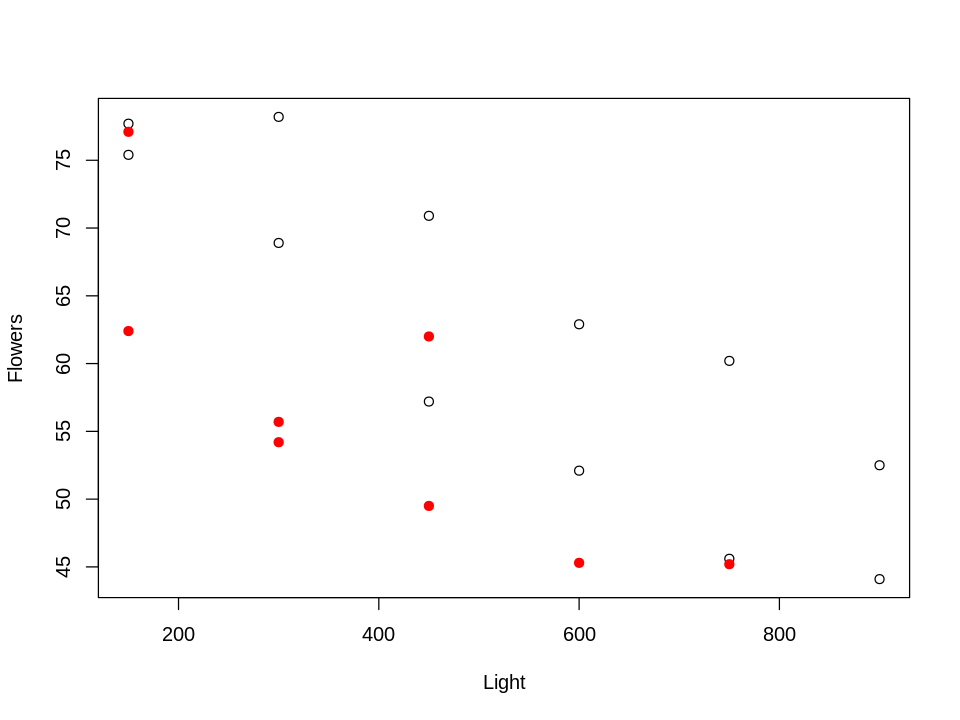

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
plot(Flowers ~ Light, data=df[df$Timing=="Before",])
points(Flowers ~ Light, data=df[df$Timing=="PFI",], col="red", pch=19)

In [ ]:
model = lm(Flowers ~ Light + Timing, data=df)
model %>% summary


Call:
lm(formula = Flowers ~ Light + Timing, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


In [ ]:
rstd = rstandard(model)
pred = fitted(model)
lev = hatvalues(model)
cook = cooks.distance(model)
dfb = dfbeta(model)
dff = dffits(model)
cvr = covratio(model)

In [ ]:
n = nrow(df)
p = length(coef(model))

## Diagnostic
Phân tích Residual vs biến Light và vs Fitted values: mẫu quá nhỏ không đánh giá được variance.
- Vs light: non-linear.
- Vs fitted values: ko có trend.

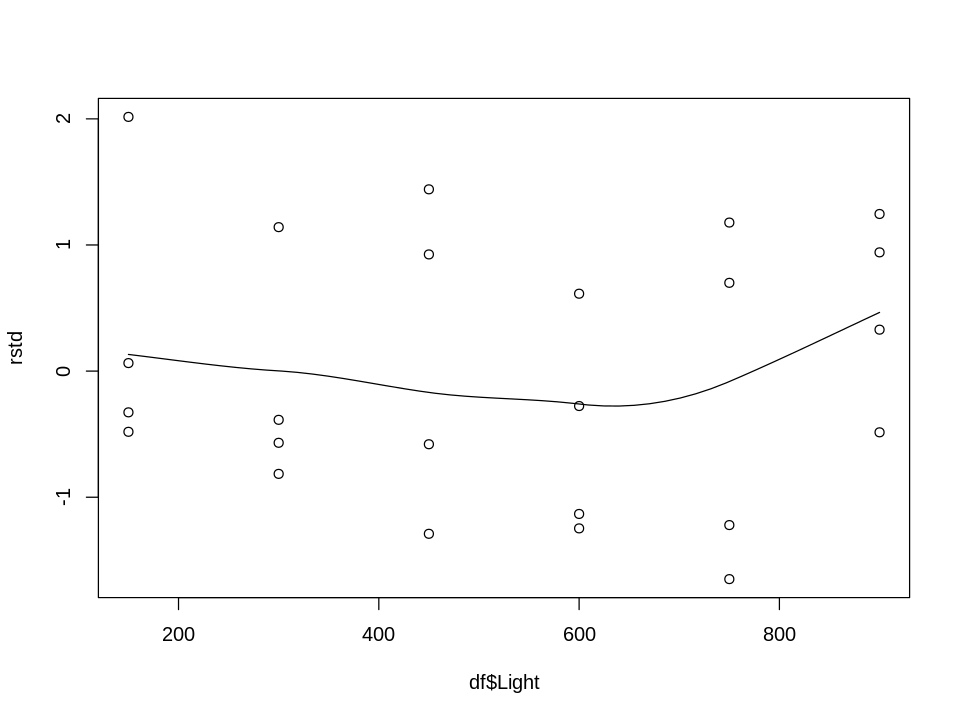

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
scatter.smooth(rstd ~ df$Light)

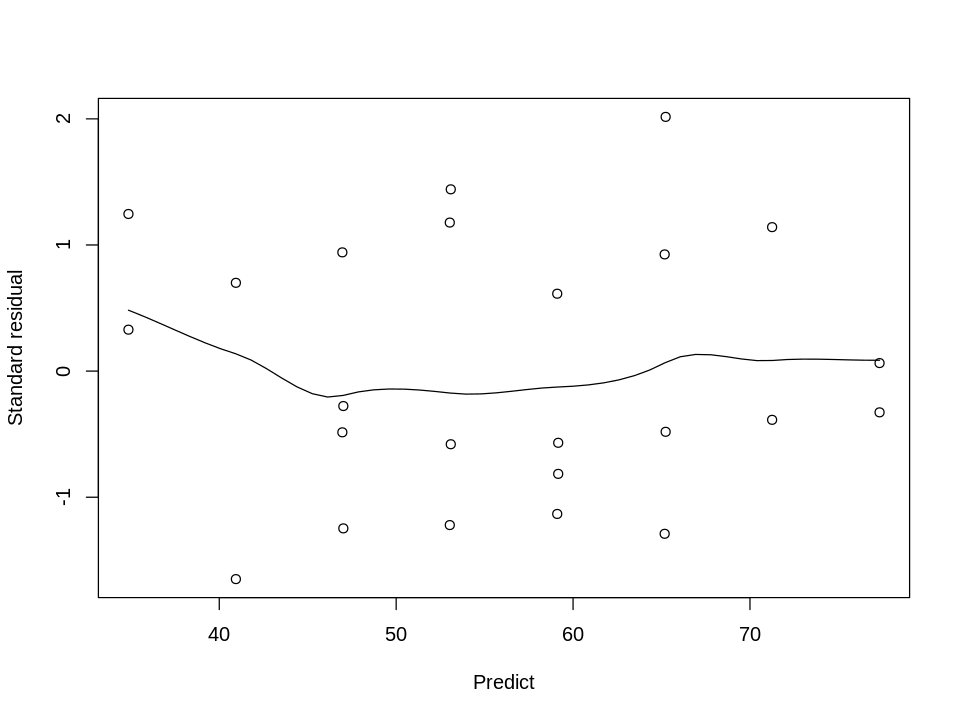

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
scatter.smooth(rstd ~ pred, ylab='Standard residual', xlab='Predict')

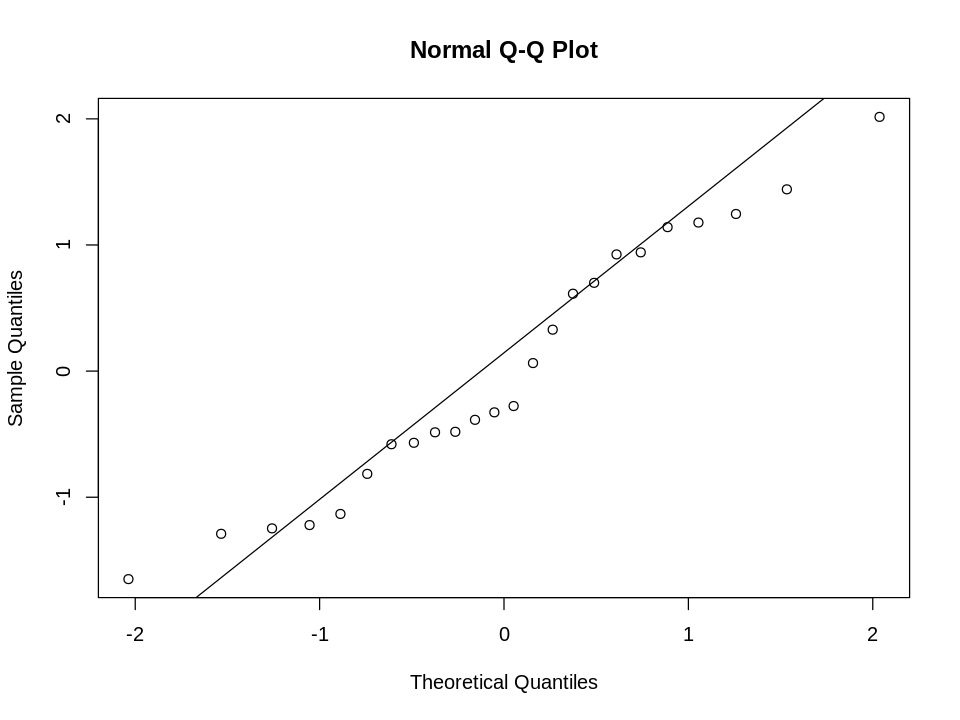

In [ ]:
qqnorm(rstd)
qqline(rstd)

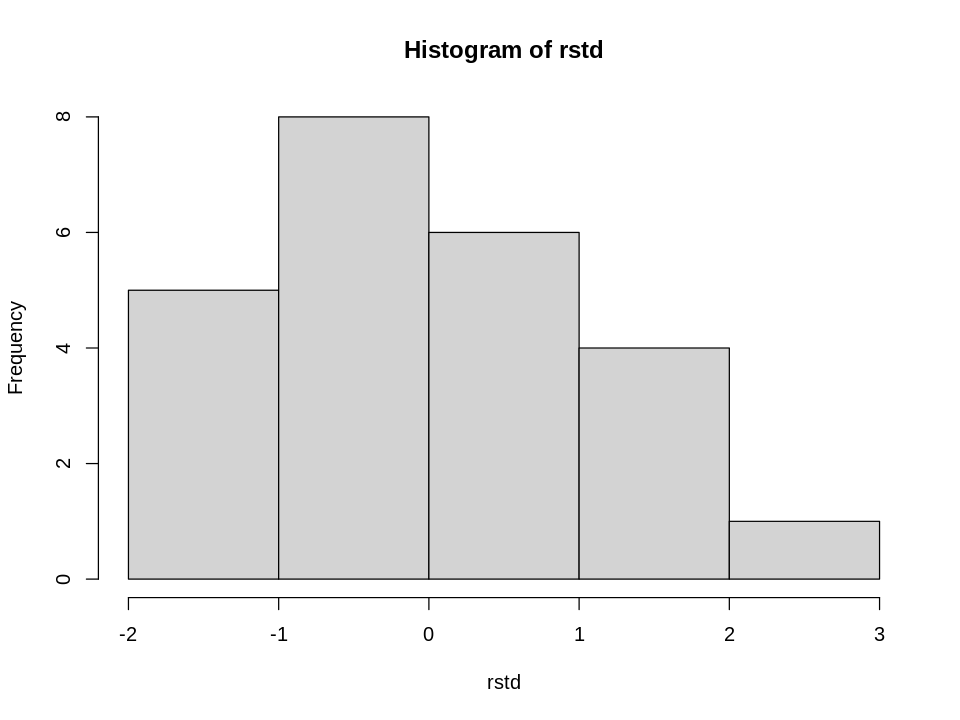

In [ ]:
hist(rstd, breaks=4)

In [ ]:
shapiro.test(rstd)
# H0: normal distributed
# p-value < 0.05: reject H0


	Shapiro-Wilk normality test

data:  rstd
W = 0.95343, p-value = 0.3209


p-value > 0.05

## Outlier

2 
2.015632

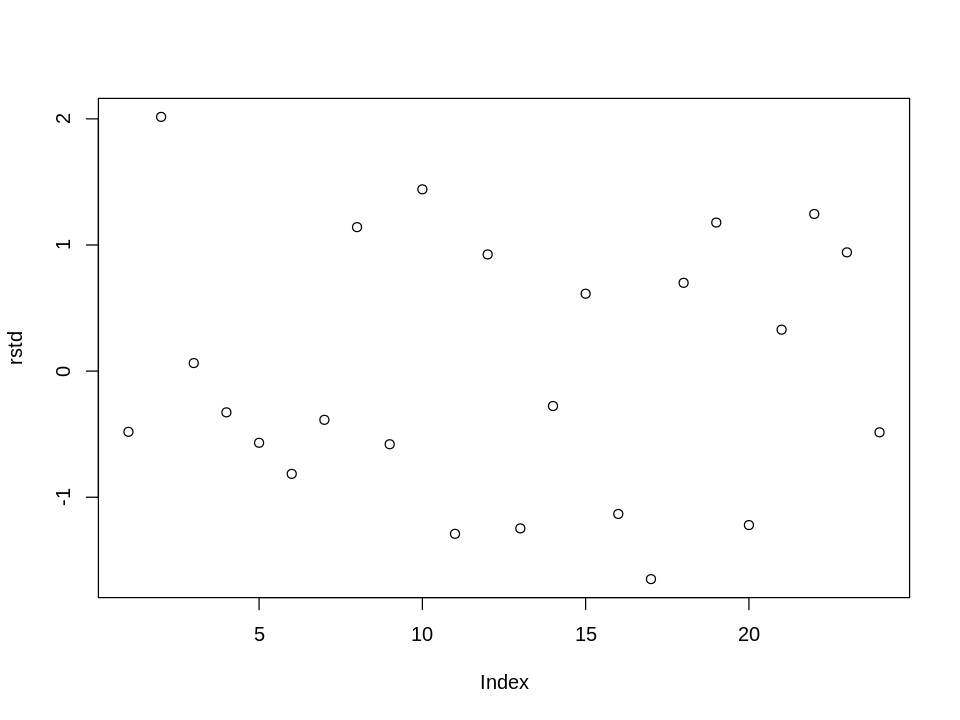

In [ ]:
rstd[abs(rstd) > 2]
plot(rstd)

## Influence


In [ ]:
n = nrow(df)
p = length(coef(model))

In [ ]:
rstd = rstandard(model)
pred = fitted(model)
lev = hatvalues(model)
cook = cooks.distance(model)
dfb = dfbeta(model)
dff = dffits(model)
covr = covratio(model)

In [ ]:
lev_thresh = 3 * p / n
cook_thresh = 4 / (n - p)
dfb_thresh = 2 / sqrt(n)
dff_thresh = 2 * sqrt(p / n)
covr_lower = 1 - (3 * p / n)
covr_upper = 1 + (3 * p / n)

In [ ]:
cook[cook > cook_thresh]

2 
0.282543

In [ ]:
max_abs_dfb <- apply(dfb, 1, function(x) max(abs(x)))

# Determine which observations violate thresholds
is_high_lev <- lev > lev_thresh
is_high_cook <- cook > cook_thresh
is_high_dfb <- max_abs_dfb > dfb_thresh
is_high_dff <- abs(dff) > dff_thresh
is_high_covr <- (covr < covr_lower) | (covr > covr_upper)

# Combine into a single data frame
influence_df <- data.frame(
    Observation = seq_len(n),
    Leverage = lev,
    CooksDistance = cook,
    MaxAbsDFBETA = max_abs_dfb,
    DFFITS = dff,
    COVRATIO = covr,
    HighLeverage = is_high_lev,
    HighCooksDistance = is_high_cook,
    HighDFBETA = is_high_dfb,
    HighDFFITS = is_high_dff,
    HighCOVRATIO = is_high_covr
)

# Add a column that flags any influential observation
influence_df$Influential <- with(
    influence_df,
    HighLeverage | HighCooksDistance | HighDFBETA | HighDFFITS | HighCOVRATIO
)

# Print the resulting data frame
influence_df
    %>% select(-HighLeverage, -HighCooksDistance, -HighDFBETA, -HighDFFITS, -HighCOVRATIO)
    %>% head

,Observation,Leverage,CooksDistance,MaxAbsDFBETA,DFFITS,COVRATIO,Influential
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,0.1726190,0.0161156718,0.42814748,-0.21577429,1.3533350,TRUE
2,2,0.1726190,0.2825429860,1.79271583,1.00045311,0.7340597,TRUE
3,3,0.1726190,0.0002812894,0.09427458,0.02835205,1.3983356,TRUE
4,4,0.1726190,0.0074404743,0.48486211,-0.14617578,1.3778680,TRUE
5,5,0.1154762,0.0140639780,0.32600942,-0.20201697,1.2492565,FALSE
6,6,0.1154762,0.0288996259,0.46732840,-0.29200480,1.1884775,TRUE


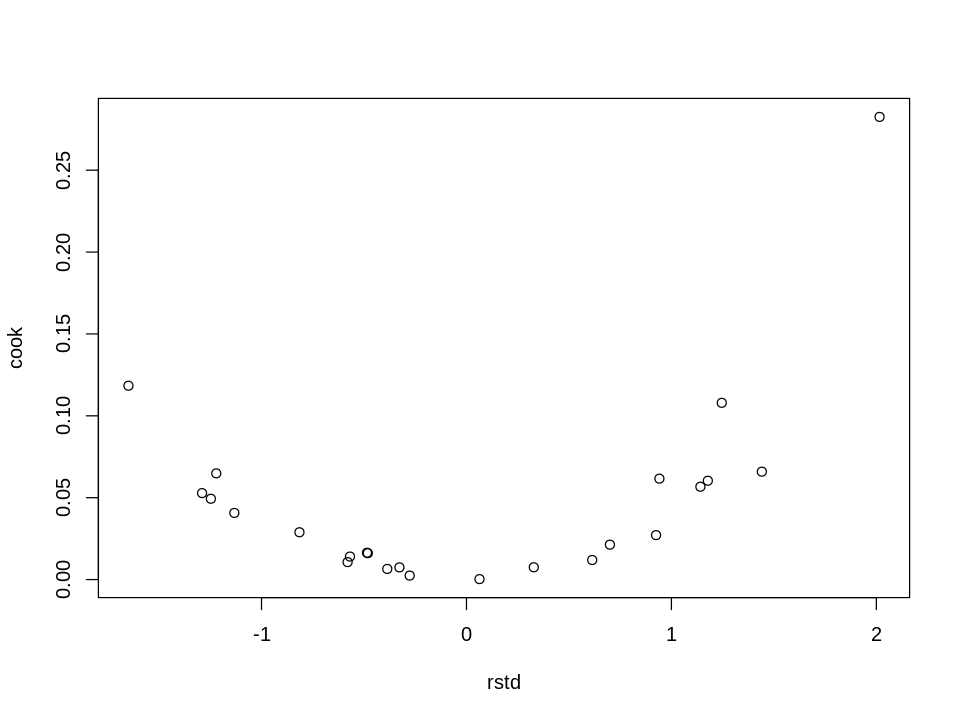

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
plot(cook ~ rstd)

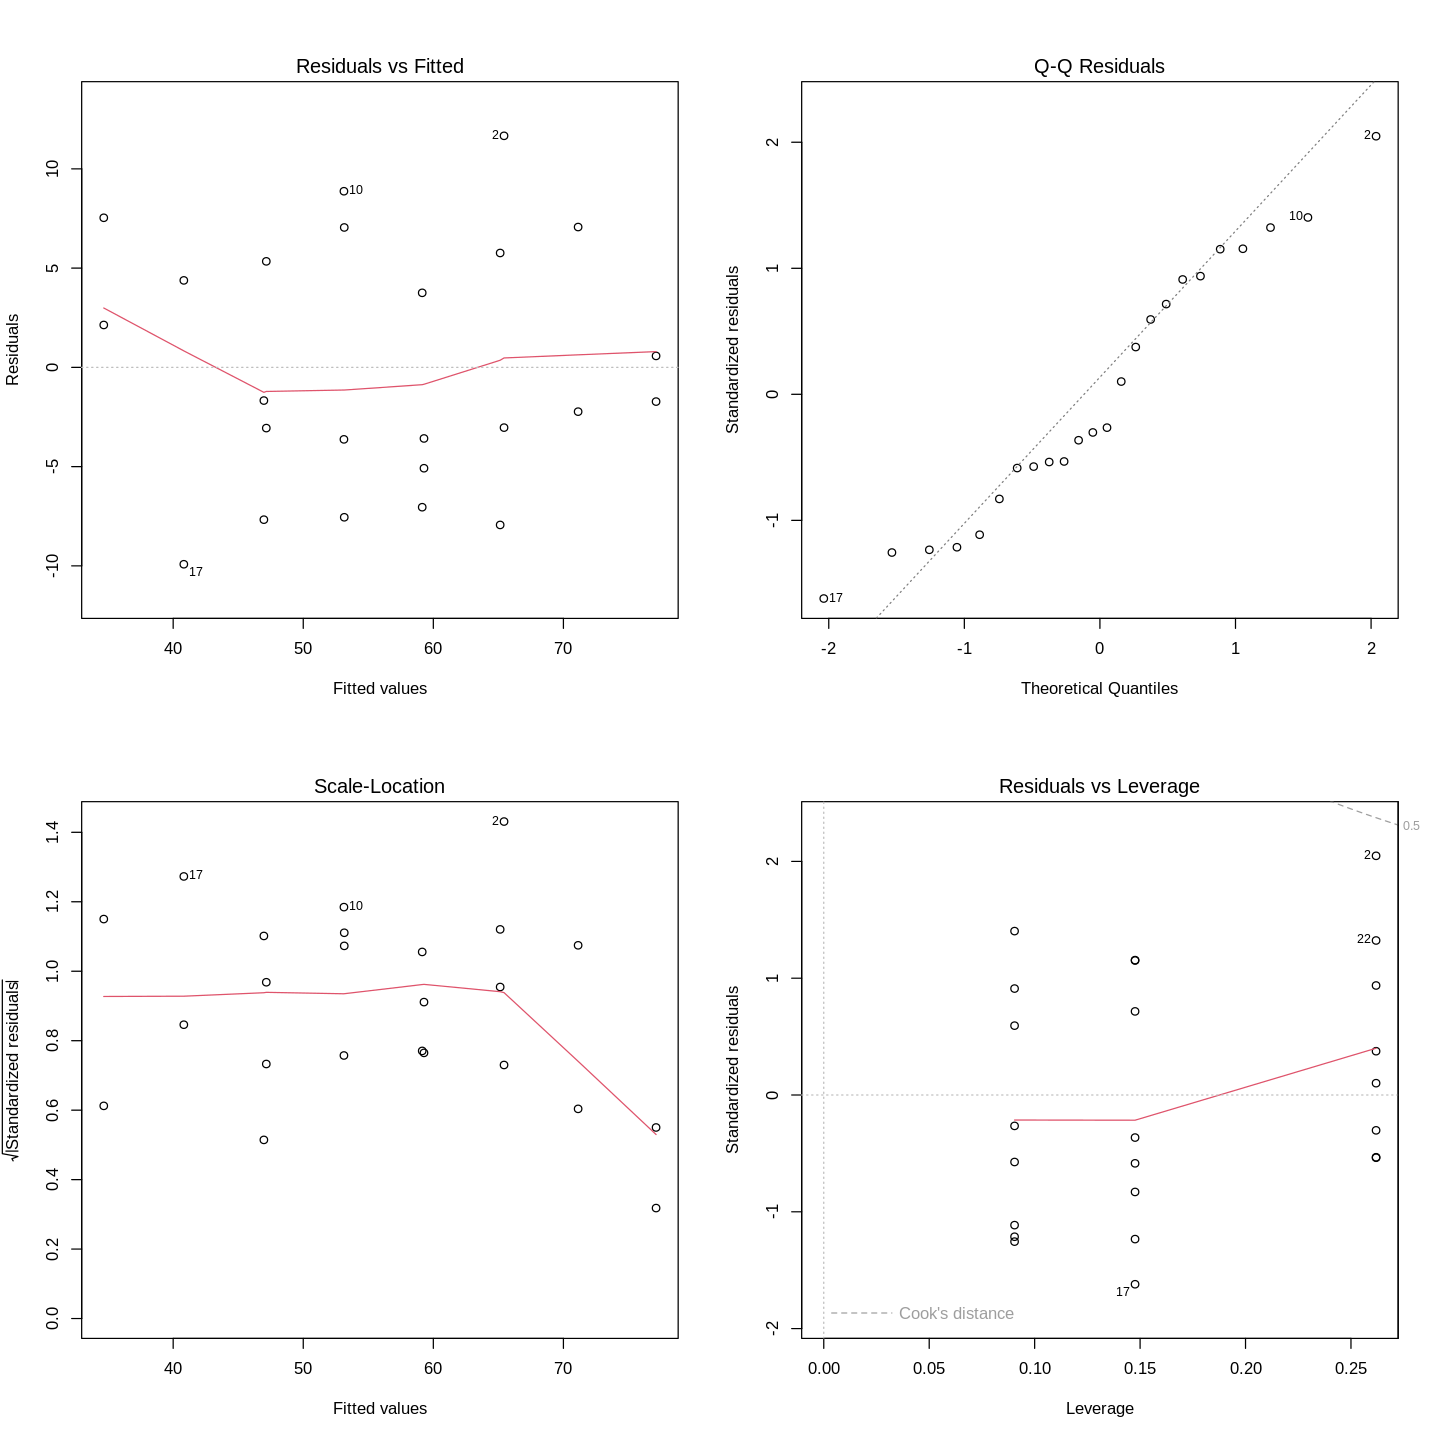

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
plot(model)

## Colinearity
Không đánh giá do 2 biến phụ thuộc là numerical và binary.

## Remove outlier

In [ ]:
df2 = df[-2, ]
model2 = lm(Flowers ~ Light + Timing, data=df2)
model2 %>% summary


Call:
lm(formula = Flowers ~ Light + Timing, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6128 -3.5676 -0.6451  4.4745 10.3645 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  81.606451   3.135884  26.023  < 2e-16 ***
Light        -0.037076   0.004995  -7.422 3.64e-07 ***
TimingPFI   -13.286811   2.491968  -5.332 3.22e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.956 on 20 degrees of freedom
Multiple R-squared:  0.8171,	Adjusted R-squared:  0.7988 
F-statistic: 44.67 on 2 and 20 DF,  p-value: 4.192e-08


In [ ]:
model %>% summary


Call:
lm(formula = Flowers ~ Light + Timing, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


In [ ]:
model %>% AIC
model2 %>% AIC

[1] 162.5441

[1] 152.1384

In [ ]:
model %>% BIC
model2 %>% BIC

[1] 167.2563

[1] 156.6804

In [ ]:
model2 %>% rstandard %>% shapiro.test


	Shapiro-Wilk normality test

data:  .
W = 0.96663, p-value = 0.6088
